<a href="https://colab.research.google.com/github/voleka-ocrv/AvitoAnalyticsAcademy/blob/main/ch4_t_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#4.1. [Критерии сравнения средних, Т-критерий Стьюдента](https://www.youtube.com/watch?v=DDFctajZEnA&t=1s)

##Задача

Есть старая база данных, загрузка данных в среднем занимает 10 ч. Мы подсчитали, что если снизить среднюю скорость загрузки так, чтобы она была меньше 7 ч., это сэкономит компании много денег. На одну неделю мы взяли в аренду новое железо, утверждается, что на нем получится достигнуть целевого снижения скорости загрузки.

За неделю мы получили следующие данные по времени загрузки:

X = [5.9, 2.45, 3.32, 6.88, 3.09, 8.13, 3.76]

ξ - это конкретная реализация случайной величины.

## z-test (Теста Фишера)
z-test можно использовать, когда **σ известна**.

Для **распределения Бернулли** использовать z-test возможно, потому что в этом случае из нулевой гипотезы (H0: $μ = p$) выводится и дисперсия σ ($σ^2_B = p(1-p)$).

Мы делаем следующие допущения:
1. Если Нулевая статистика верна, то статистика будет распределена по нормальному закону.
2. Используя ЦПТ мы делали допущение, что распределение будет нормальным, но начиная с достаточно больших значений n (количества наблюдений).

$z = \frac{\bar{x}-\mu_0}{\sqrt{\frac{σ^2}{n}}} ∼ Norm(0, 1)$

В нашей задаче для оценки среднего, сложность возникает с тем, чтобы определить σ и n.

$z = \frac{4.7-7}{\sqrt{\frac{σ^2}{n}}}$

Для критерия проверки среднего мы должны ответить на два вопроса:
1. $σ - ?$ Как определить сигму
2. $n - ?$ Как понять сколько n будет достаточно

Самый главный тезис курса:

1. Мы придумали как должна выглядеть статистика
2. Определяем, как (из предположения, что гипотеза верна) будет выглядеть распределение.

## T'

Для начала предположим, что **ξ уже нормально распределена**, тогда:

1. Если просуммировать n нормальных распределений $𝒩(μ, σ^2)$, то на выходе получим тоже нормальное распределение, причем с известным мат.ожиданием и дисперсией 𝒩(n*μ, n*σ^2)$ ⇒

2. Для произвольно распределенной величины z-статистика будет нормально распределена начиная с некотогоро n, а для нормально распределенной величины, z-статистика сразу нормально распределена. ⇒

3. Таким образом для нас становится **не важно значение n**.

Несмещенная состоятельная оценка дисперсии

$\hat{σ}^2=S^2 = \frac{1}{n-1}\sum_{n=1}^{n}(x_i - \bar{x})^2$

n-1 - количество степеней свободы

Подставим эту несмещенную состоятельную оценку дисперсии в формулу вместо σ.

Мы получим уже новый критерий (t-критерий) в котором вместо истинного σ используется некоторая его оценка.

$T' = \frac{\bar{x}-\mu_0}{\sqrt{\frac{\frac{1}{n-1}\sum_{n=1}^{n}(x_i - \bar{x})^2}{n}}} ∼ Norm(0, 1)$




In [ ]:
import numpy
from scipy.stats import norm
from matplotlib import pyplot
from seaborn import displot

In [ ]:
X = numpy.array([5.9, 2.45, 3.32, 6.88, 3.09, 8.13, 3.76])
# ddof = 1 - delta degrees of freedom - это значит, что делим не на n, а на n-1

print(f"Оценка sigma^2: {numpy.var(X, ddof=1)}")

Оценка sigma^2: 4.723866666666668


In [ ]:
def sample_statistics(number_of_experiments, statistic_function, sample_size, sample_distr):
  '''
  Функция для генерации выборки некой статистики statistic_function, nостроенной до выборке из распреде Возвращает выборку размера number_of_experiments для statistic_function.

  Праметры:

  number_of_experiments: число экспериментов, в каждом из которых ны посчитаем statistic_function statistic_function: статистика, которая принимает на вход выборку из распределения sample_distr

  sample_size: размер выборки, которая подается на вход statistic_function

  sample_distr: pаспределение изначальной выборки, по которой считается статистика
  '''
  statistic_sample = []
  for _ in range(number_of_experiments):
    # генерируем пиmber_of_experiments раз выборку
    sample = sample_distr.rvs(sample_size)

    # считаем статистику
    statistic = statistic_function(sample)

    # сохраняем
    statistic_sample.append(statistic)

  return statistic_sample

In [ ]:
numpy.random.seed(3)

In [ ]:
sample_size=7
M = 100000
sample_distr = norm(loc=5, scale=1)

In [ ]:
T_X = lambda sample: numpy.sqrt(sample_size) * (numpy.mean(sample) - sample_distr.mean()) / numpy.sqrt(numpy.var(sample, ddof=1)) # or numpy.std()
Z_X = lambda sample: numpy.sqrt(sample_size) * (numpy.mean(sample) - sample_distr.mean()) / sample_distr.std()

In [ ]:
samples = {
"T(X)": sample_statistics(number_of_experiments=M, statistic_function=T_X, sample_size=sample_size, sample_distr=sample_distr),
"Z(X)": sample_statistics(number_of_experiments=M, statistic_function=Z_X, sample_size=sample_size, sample_distr=sample_distr)
}

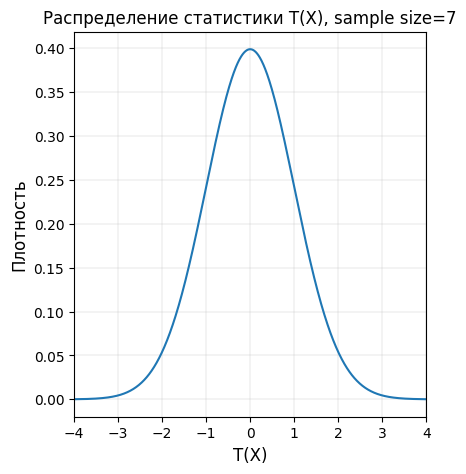

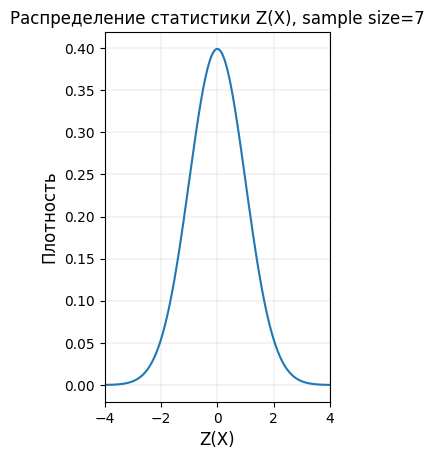

In [ ]:
pyplot.figure(figsize=(10, 5))
# pyplot.subplot(1, 2, 1)

for i, name in enumerate(["T(X)", "Z(X)"]):
  pyplot.subplot(1, 2, i+1)
  current_sample = samples[name]
  l_bound, r_bound = [-4, 4]

  x = numpy.linspace(l_bound, r_bound, 1000)
  pyplot.title(f"Pаспределение статистики {name}, sample size={sample_size}", fontsize=12)
  # displot(current_sample, label='Эмпирическое распределение')
  pyplot.plot(x, norm(0, 1).pdf(x), label='$\mathcal{N}(0, 1)$')
  pyplot.xlabel(f'{name}', fontsize=12)
  pyplot.xlim((l_bound, r_bound))
  pyplot.ylabel('Плотность', fontsize=12)
  pyplot.grid(linewidth=0.2)
  pyplot.show();

#4.2. [Т-тест](https://www.youtube.com/watch?v=UStRqCtGUy4&t=3s)

$T ∼ Student(n-1)$

In [ ]:
from scipy.stats import t

In [ ]:
X = numpy.array([5.9, 2.45, 3.32, 6.88, 3.09, 8.13, 3.76])

In [ ]:
t_stat = (numpy.mean(X) - 7) / (numpy.var(X, ddof=1) / X.size)**0.5

In [ ]:
t_stat

-2.6902489974105612

In [ ]:
p_value = t(X.size - 1).cdf(t_stat)

In [ ]:
p_value

0.01802035750889251

Здесь использован левосторонний критерий (𝔼(ξ) < 7), потому что если среднее время окажется больше 7, то это изменение будет для нас нежелательным.

Мы можем использовать односторонний критерий, который реализован в пакете scipy. Получим тот же самый результат.

In [ ]:
from scipy.stats import ttest_1samp

In [ ]:
ttest_1samp(X, popmean=7, alternative='less')

TtestResult(statistic=-2.690248997410561, pvalue=0.01802035750889251, df=6)

alpha = 0.5

Т.к. мы получили p_value <= alpha (0.018 <= 0.5), что позволяет отвергнуть H0.

Мы видим, что на уровне значимости 2,5% критерий отвергся, а значит переход на новую СУБД удовлетворяет условиям загрузки быстрее 7 часов.

#4.3. [Доверительный интервал](https://www.youtube.com/watch?v=iUrG8dNcjIY)

ДИ = множество m, при которых тест не отвергает гипотезу H0: 𝔼(ξ) = m.

ДИ - это всегда производная негоко теста. Рассмотрим двусторонний тест с alpha = 5%

Возьмем 2,5% перцентиль для t-testa (Распределения Стьюдента)

$t_{0.025}(df=n-1) < \frac{\bar{x}-m}{\sqrt{\frac{S^2}{n}}} < t_{0.975}(df=n-1)$

Выполнив преобразования получаем следующее выражение для Доверительного Интервала:

$\bar{x} -t_{0.025}(df=n-1)*\sqrt{\frac{S^2}{n}} > m>\bar{x} -t_{0.975}(df=n-1)*\sqrt{\frac{S^2}{n}}$

Зная, что Распределение Стьюдента симметрично, можем заменить с учетом знака:

$\bar{x} +t_{0.975}(df=n-1)*\sqrt{\frac{S^2}{n}} > m>\bar{x} -t_{0.975}(df=n-1)*\sqrt{\frac{S^2}{n}}$

$\sqrt{\frac{S^2}{n}}$ - SEM (Standard Error of the Mean / стандартная ошибка среднего)

---
$m ∈ \bar{x} ± t_{0.975}(df=n-1)*SEM$

In [ ]:
left_bound, right_bound = t.interval(confidence=0.95, loc=numpy.mean(X), scale=(numpy.var(X, ddof=1) / X.size)**0.5, df=X.size-1)
print(f"CI = [{left_bound:.2f}, {right_bound:.2f}]")

CI = [2.78, 6.80]


Параметры инициализации:
- `loc` - это μ
- `scale` - это σ, или стандартное отклонение. Не дисперсия!

Получаем, что время загрузки находится в интервале от 2,8 до 6,8 часов.

In [ ]:
left_bound, right_bound = t.interval(alpha=0.95, loc=numpy.mean(X), scale=numpy.std(X, ddof=1) / X.size**0.5, df=X.size-1)

#4.4. [А/В тесты. Двувыборочный Т-тест](https://www.youtube.com/watch?v=PA45NS9v_hA&t=1s)

$B_1, B_2, ... \ \bar{B}$

$H0: 𝔼(B) = ARPU_{without_discounts}$

$H0: 𝔼(B) > _{without_discounts}$

Проблема в том, что мы не знаем с чем сравнивать.

Введем еще одну группу

$A_1, A_2, ... \ \bar{A}$

Помимо воздействия (treatment) группы не должны ничем различаться, это свойство называется СБАЛАНСИРОВАННОСТЬ выборок.

Пропорции разных пользователей в выборки должны быть такие же как в генеральной совокупности - РЕПРЕЗЕНТАТИВНОСТЬ.

A и B
- сбалансированы
- репрезентативны

Таким образом, гипотезы преобразуются к виду:

$H0: 𝔼(B) = 𝔼(A)$

$H0: 𝔼(B) > 𝔼(A)$

Предположим, что группы A и B достаточно большие, так что мы можем считать, что среднее этих выборок распределено нормально.

In [ ]:
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import CompareMeans, DescrStatsW

In [ ]:
numpy.random.seed(42)
X = expon(scale=1100).rvs(1000)
Y = norm(loc=980, scale=30).rvs(1000)

ttest_ind(X, Y, equal_var=False, alternative='greater')
# если дисперсии неизвестны, то лучше всегда предполагать, что они не равны
# проверяем односторонюю гипотезу - с точки зрения бизнес задачи это чаще имеет смысл

TtestResult(statistic=2.5645688722251325, pvalue=0.005237676356845092, df=1000.5367318148768)

Доверительный интервал

In [ ]:
сm = CompareMeans(DescrStatsW(X), DescrStatsW(Y))
сm.tconfint_diff(usevar='unequal')

(20.380593037118146, 153.19874340946558)

#4.5. [MDE для Т-теста](https://www.youtube.com/watch?v=mkHDCK0dpzA&t=1s)

MDE - рассчитывается до начала эксперимента

Пусть мы хотим проверить гипотезу о том, что среднее некоей выборки отличается от константы $H0: 𝔼(X) = m_0$. Причем проверка будет выполняться со стат.значимостью $α = FPR = 5\%$ и мощностью $1 - β = power = 80\%$.

Какой должен быть истинний эффект, чтобы мы могли его задетектировать?


---
$MDE = SEM*(z_{1-α} + z_{1-β}) = \frac{\hat{σ}}{\sqrt{N}}*(z_{1-α} + z_{1-β})$

###1. Бизнес-задача / бизнес гипотеза
Гипотеза: если мы добьемся снижения времени загрузки до 7 часов, то сэкономим компании много денег.
### 2. Формулируем нулевую и альтернативную гипотезы
H0: 𝔼(ξ) = 7 - мат.ожидание времени загрузки равно 7 ч.

H1: 𝔼(ξ) < 7 - мат.ожидание времени загрузки меньше 7 ч. Это желаемый исход

### 3. Выбираем статистику
Статистика - некоторое число, которое будет говорить нам о том, насклько похожа H0 на правду.

Статистика 𝔼(ξ) ⇒ нас будет интреесовать критерий для сравнения средних.
##4. Понять как статистика Q распределена, если верна нулевая гипотеза
alpha - как часто ошибаемся,

p-value - площадь всех столобцов графика, попадание в который выглядит слишком экстремально
##5. MDE
Каким должен быть минимальный эффект, чтобы мы могли задетектировать изменение.
Зависит от
- размер выборки $n$
- искомая мощность $β$ (FP)
- уровень


##6. Построить Доверительный интервал
$\mu ⊂ [0.55 ... 0.87]$